# Introduction

This notebook shows how object detection can be done on your own dataset by training YOLOv2. I am going to use soccer playing images as training dataset as an example to detect soccer ball. After finishing this notebook, you will be able to train your own model, and detect objects that you are interested in.

It is really your choice which implementation to use. I happened to choose [darkflow](https://github.com/thtrieu/darkflow) which has been quite popular for Tensorflow support on Github open source hosting service. However, you can build the YOLO model on your own since the [official web-site](https://pjreddie.com/darknet/yolo/) provides its pre-trained weights as an external file.

Here is another choice of implementation called, [tensornets](https://github.com/taehoonlee/tensornets). Please check it out.

## Preparing the Data

__1. Search for your interest__

__2. Collect media files for training (image, video)__
  - Be aware of what your **problem domain** is
    - For example, the wide camera angle shot for a soccer play, the soccer ball is very tiny. However, the ball size gets pretty bigger with the close-up camera shot. These two different types of photo mean the different domains. 
    - In my case, I **collected pictures of only close-up camera shot**.
    - Also, the collected pictures are **soley from 2018 Russia World Cup games**.

__3. Collect media files for testing (image, video)__
  - It is a common sense not to use the same data from the training process for testing purpose. 
  - I just chose some random pictures and a video from internet to check if the trained algorithm performs well with un-seen dataset

__4. If your media file is video, make a lot of screenshot__
  - Here is how to take a bulk screenshot [LINK](https://pibby.livejournal.com/164326.html)
  
__5. Make annotations with drawing rectangles__
  <div stlye="text-align:center;">
      <img src="https://raw.githubusercontent.com/tzutalin/labelImg/master/demo/demo3.jpg"/ style="width:500px;">
  </div>
  
  - Here is a tool to do it [LINK](https://github.com/tzutalin/labelImg)

## Downloading my dataset

I have collected dataset from several youtube videos of highlights in 2018 Russia World Cup. Here is a breif steps how I have done.
1. **downloaded several videos** of highlights in 2018 Russia World Cup from Youtube.
2. produced a bunch of **bulk screenshots** using VLC player.
3. **kept images** that I am **only interested** in.
4. used [LabelImg](https://github.com/tzutalin/labelImg) software to **make annotations** in each image.
5. **located images in './images/' directory and annotations in './annotations/' directory**.

Below is the link of my work. If you want to train on your own machine, please download **'soccer_ball_data.zip'** file and unzip it. You will see three separate folders. **Two of them(images, annotations)** are explained above, and **sample_video folder** contains a sample_video file to verify the result.

https://drive.google.com/drive/folders/1th1odcC5kjEnkZmwooETYlyLsz5AOTph?usp=sharing

## Importing Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

C:\Users\md459\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Specifying Classes of Your Interest

You also need to changes __'labels.txt'__ file included in the root directory. Just specify names of objects. In my case, I removed all text and left __'ball'__ instead.

## Downloading Pre-trained Weights

Please go [here](https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU) and **download a pre-trained weights** that you are interested. In my case, I downloaded **yolo.weights**. After downloading is done, **locate the file into 'bin'** directory in the root directory.

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/deep-diver/Object-Detection-YOLOv2-Darkflow/master/weights.PNG"/>
</div>

## Defining Model Options & Build the Model

Before building the model, you need to define options. 

__1. model__: **configuration** file (\*.cfg) that you have defined for your situation

__2. load__: **pre-trained weight** file

__3. batch__: a number of data to train per a batch
  - I set batch size 8 because my GPU card couldn't handle bigger size. My GPU card is **NVIDIA GTX 1080Ti**.

__4. epoch__: how many iterations to train
  - I probably need to set this a bit smaller, but as the result shows I think 100 epochs are just fine

__5. gpu__: set **1.0** if you want to fully utilize your GPU hardware. Otherwise, remove this option.

__6. train__: set **'True'** if your purpose is training

__7. annotation__: **directory** where the annotation files are stored

__8. dataset__: **directory** where the image files are stored

In [2]:
options = {"model": "cfg/yolov2_custom.cfg", 
           "load": "weights/yolov2.weights",
           "batch": 1,
           "epoch": 50,
           "gpu": 1.0,
           'threshold': 0.1,
           'labels': 'labels.txt',
           "train": True,
           "annotation": "data/Annotations/",
           "dataset": "data/JPEGImages/"}

In [3]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolov2_custom.cfg
Loading weights/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.05307173728942871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 480, 480, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 480, 480, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 240, 240, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 240, 240, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 120, 120, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 120, 120, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 120, 120, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 120, 120, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 60, 60, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky  

## Training the Model

Training took about **an hour** on NVIDIA GTX 1080Ti

In [4]:
tfnet.train()


cfg/yolov2_custom.cfg parsing data/Annotations/
Parsing for ['usb', 'charge', 'done', 'batt+', 'batt-', 'rprog'] 
[====================>]100%  circuit_060.xml
Statistics:
usb: 60
charge: 70
done: 70
rprog: 60
batt+: 71
batt-: 59
Dataset size: 60
Dataset of 60 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 1
	Epoch number  : 50
	Backup every  : 2000
step 1 - loss 148.47618103027344 - moving ave loss 148.47618103027344
step 2 - loss 146.58316040039062 - moving ave loss 148.28687896728516
step 3 - loss 145.76307678222656 - moving ave loss 148.0344987487793
step 4 - loss 144.87759399414062 - moving ave loss 147.71880827331546
step 5 - loss 144.24380493164062 - moving ave loss 147.37130793914798
step 6 - loss 143.26620483398438 - moving ave loss 146.96079762863164
step 7 - loss 142.48672485351562 - moving ave loss 146.51339035112005
step 8 - loss 142.90721130371094 - moving ave loss 146.15277244637915
step 9 - loss 140.81365966796875 - moving ave loss 145.6188611

step 113 - loss 97.54364776611328 - moving ave loss 94.83395018766315
step 114 - loss 87.44483947753906 - moving ave loss 94.09503911665074
step 115 - loss 87.76219940185547 - moving ave loss 93.46175514517121
step 116 - loss 85.19160461425781 - moving ave loss 92.63474009207988
step 117 - loss 85.72869110107422 - moving ave loss 91.94413519297932
step 118 - loss 83.65655517578125 - moving ave loss 91.11537719125951
step 119 - loss 85.15908813476562 - moving ave loss 90.51974828561012
step 120 - loss 85.60777282714844 - moving ave loss 90.02855073976394
Finish 2 epoch(es)
step 121 - loss 91.48358154296875 - moving ave loss 90.17405382008442
step 122 - loss 84.11982727050781 - moving ave loss 89.56863116512677
step 123 - loss 84.95186614990234 - moving ave loss 89.10695466360433
step 124 - loss 84.39788818359375 - moving ave loss 88.63604801560327
step 125 - loss 82.13239288330078 - moving ave loss 87.98568250237301
step 126 - loss 83.16161346435547 - moving ave loss 87.50327559857126
s

step 230 - loss 43.706947326660156 - moving ave loss 47.05273081556379
step 231 - loss 42.359230041503906 - moving ave loss 46.58338073815781
step 232 - loss 40.17133331298828 - moving ave loss 45.94217599564086
step 233 - loss 40.45846939086914 - moving ave loss 45.39380533516369
step 234 - loss 40.606529235839844 - moving ave loss 44.91507772523131
step 235 - loss 40.55244445800781 - moving ave loss 44.478814398508966
step 236 - loss 53.51165008544922 - moving ave loss 45.382097967202995
step 237 - loss 40.84166717529297 - moving ave loss 44.928054888012
step 238 - loss 40.65428924560547 - moving ave loss 44.50067832377135
step 239 - loss 39.40473175048828 - moving ave loss 43.991083666443046
step 240 - loss 40.93606185913086 - moving ave loss 43.68558148571183
Finish 4 epoch(es)
step 241 - loss 39.39466857910156 - moving ave loss 43.2564901950508
step 242 - loss 50.51395797729492 - moving ave loss 43.982236973275214
step 243 - loss 38.598854064941406 - moving ave loss 43.44389868244

step 345 - loss 20.575523376464844 - moving ave loss 24.138591030146824
step 346 - loss 21.741771697998047 - moving ave loss 23.898909096931945
step 347 - loss 19.294225692749023 - moving ave loss 23.438440756513653
step 348 - loss 19.691112518310547 - moving ave loss 23.063707932693344
step 349 - loss 19.309768676757812 - moving ave loss 22.68831400709979
step 350 - loss 19.907148361206055 - moving ave loss 22.41019744251042
step 351 - loss 19.6384220123291 - moving ave loss 22.13301989949229
step 352 - loss 18.61680030822754 - moving ave loss 21.781397940365814
step 353 - loss 19.3795166015625 - moving ave loss 21.541209806485483
step 354 - loss 20.341678619384766 - moving ave loss 21.421256687775415
step 355 - loss 18.66769027709961 - moving ave loss 21.145900046707833
step 356 - loss 19.09604263305664 - moving ave loss 20.940914305342712
step 357 - loss 21.9169921875 - moving ave loss 21.03852209355844
step 358 - loss 26.911643981933594 - moving ave loss 21.625834282395957
step 359

step 460 - loss 9.002265930175781 - moving ave loss 11.48698612720661
step 461 - loss 8.609554290771484 - moving ave loss 11.199242943563096
step 462 - loss 10.327203750610352 - moving ave loss 11.112039024267823
step 463 - loss 12.620508193969727 - moving ave loss 11.262885941238014
step 464 - loss 10.089317321777344 - moving ave loss 11.145529079291947
step 465 - loss 17.33161735534668 - moving ave loss 11.764137906897421
step 466 - loss 9.602232933044434 - moving ave loss 11.547947409512123
step 467 - loss 9.740411758422852 - moving ave loss 11.367193844403195
step 468 - loss 10.550588607788086 - moving ave loss 11.285533320741685
step 469 - loss 9.862650871276855 - moving ave loss 11.143245075795203
step 470 - loss 18.069013595581055 - moving ave loss 11.83582192777379
step 471 - loss 9.59182357788086 - moving ave loss 11.611422092784496
step 472 - loss 14.43474006652832 - moving ave loss 11.89375389015888
step 473 - loss 17.01424789428711 - moving ave loss 12.405803290571704
step 

step 577 - loss 5.715371131896973 - moving ave loss 7.336425192494458
step 578 - loss 5.328125 - moving ave loss 7.1355951732450125
step 579 - loss 6.392121315002441 - moving ave loss 7.061247787420755
step 580 - loss 7.186603546142578 - moving ave loss 7.073783363292938
step 581 - loss 5.217244625091553 - moving ave loss 6.888129489472799
step 582 - loss 4.8972673416137695 - moving ave loss 6.689043274686897
step 583 - loss 5.069032192230225 - moving ave loss 6.5270421664412295
step 584 - loss 4.9638991355896 - moving ave loss 6.370727863356066
step 585 - loss 9.67440128326416 - moving ave loss 6.701095205346876
step 586 - loss 5.316622734069824 - moving ave loss 6.562647958219171
step 587 - loss 4.542597770690918 - moving ave loss 6.360642939466346
step 588 - loss 9.68602180480957 - moving ave loss 6.693180826000669
step 589 - loss 4.799270153045654 - moving ave loss 6.503789758705167
step 590 - loss 4.696765422821045 - moving ave loss 6.323087325116755
step 591 - loss 4.378304958343

step 694 - loss 7.967555522918701 - moving ave loss 4.491560114789283
step 695 - loss 10.368402481079102 - moving ave loss 5.079244351418264
step 696 - loss 2.4377474784851074 - moving ave loss 4.815094664124948
step 697 - loss 3.417935848236084 - moving ave loss 4.675378782536062
step 698 - loss 2.460202932357788 - moving ave loss 4.4538611975182345
step 699 - loss 6.075448513031006 - moving ave loss 4.616019929069512
step 700 - loss 7.562385082244873 - moving ave loss 4.9106564443870475
step 701 - loss 3.5480566024780273 - moving ave loss 4.7743964601961455
step 702 - loss 5.140420913696289 - moving ave loss 4.81099890554616
step 703 - loss 7.784795761108398 - moving ave loss 5.108378591102384
step 704 - loss 5.5646467208862305 - moving ave loss 5.154005404080769
step 705 - loss 3.7057273387908936 - moving ave loss 5.009177597551781
step 706 - loss 2.98840069770813 - moving ave loss 4.807099907567416
step 707 - loss 4.603282928466797 - moving ave loss 4.786718209657354
step 708 - los

step 810 - loss 3.4109039306640625 - moving ave loss 3.0686055527582914
step 811 - loss 2.7460737228393555 - moving ave loss 3.036352369766398
step 812 - loss 4.106987953186035 - moving ave loss 3.143415928108362
step 813 - loss 1.4081960916519165 - moving ave loss 2.9698939444627173
step 814 - loss 1.9474334716796875 - moving ave loss 2.8676478971844146
step 815 - loss 5.346959590911865 - moving ave loss 3.1155790665571597
step 816 - loss 3.4246435165405273 - moving ave loss 3.1464855115554964
step 817 - loss 2.194866180419922 - moving ave loss 3.051323578441939
step 818 - loss 2.0806307792663574 - moving ave loss 2.954254298524381
step 819 - loss 2.664191722869873 - moving ave loss 2.9252480409589303
step 820 - loss 1.7613189220428467 - moving ave loss 2.808855129067322
step 821 - loss 1.2854368686676025 - moving ave loss 2.6565133030273502
step 822 - loss 6.11857795715332 - moving ave loss 3.002719768439947
step 823 - loss 2.521148443222046 - moving ave loss 2.9545626359181574
step 

step 925 - loss 4.445530891418457 - moving ave loss 2.718632806154515
step 926 - loss 1.2889595031738281 - moving ave loss 2.5756654758564466
step 927 - loss 3.0470645427703857 - moving ave loss 2.6228053825478406
step 928 - loss 5.040132522583008 - moving ave loss 2.8645380965513576
step 929 - loss 2.1250109672546387 - moving ave loss 2.7905853836216856
step 930 - loss 3.6618757247924805 - moving ave loss 2.877714417738765
step 931 - loss 1.4115465879440308 - moving ave loss 2.731097634759292
step 932 - loss 3.074786424636841 - moving ave loss 2.765466513747047
step 933 - loss 1.107873558998108 - moving ave loss 2.5997072182721532
step 934 - loss 1.640094518661499 - moving ave loss 2.5037459483110878
step 935 - loss 0.7994512319564819 - moving ave loss 2.3333164766756274
step 936 - loss 4.046050548553467 - moving ave loss 2.504589883863411
step 937 - loss 2.4643595218658447 - moving ave loss 2.500566847663655
step 938 - loss 1.513105034828186 - moving ave loss 2.4018206663801083
step 

step 1040 - loss 2.2714684009552 - moving ave loss 1.7189461430558723
step 1041 - loss 2.007815361022949 - moving ave loss 1.74783306485258
step 1042 - loss 0.7050318121910095 - moving ave loss 1.643552939586423
step 1043 - loss 6.375957489013672 - moving ave loss 2.116793394529148
step 1044 - loss 2.5590686798095703 - moving ave loss 2.16102092305719
step 1045 - loss 5.683709621429443 - moving ave loss 2.5132897928944153
step 1046 - loss 5.814998626708984 - moving ave loss 2.843460676275872
step 1047 - loss 1.58571195602417 - moving ave loss 2.717685804250702
step 1048 - loss 2.165846586227417 - moving ave loss 2.6625018824483737
step 1049 - loss 3.3218960762023926 - moving ave loss 2.728441301823776
step 1050 - loss 1.9000043869018555 - moving ave loss 2.645597610331584
step 1051 - loss 0.6357065439224243 - moving ave loss 2.444608503690668
step 1052 - loss 3.7029919624328613 - moving ave loss 2.5704468495648873
step 1053 - loss 1.1220645904541016 - moving ave loss 2.425608623653809


step 1154 - loss 0.6611326932907104 - moving ave loss 2.148207092325738
step 1155 - loss 1.8589198589324951 - moving ave loss 2.1192783689864134
step 1156 - loss 2.8881213665008545 - moving ave loss 2.1961626687378577
step 1157 - loss 1.9444189071655273 - moving ave loss 2.1709882925806245
step 1158 - loss 0.8025062680244446 - moving ave loss 2.0341400901250064
step 1159 - loss 0.9595059156417847 - moving ave loss 1.9266766726766844
step 1160 - loss 1.3588569164276123 - moving ave loss 1.8698946970517774
step 1161 - loss 0.6952235698699951 - moving ave loss 1.7524275843335992
step 1162 - loss 2.0888640880584717 - moving ave loss 1.7860712347060868
step 1163 - loss 1.4922398328781128 - moving ave loss 1.7566880945232894
step 1164 - loss 1.3595722913742065 - moving ave loss 1.7169765142083813
step 1165 - loss 1.0594450235366821 - moving ave loss 1.6512233651412114
step 1166 - loss 4.700865745544434 - moving ave loss 1.9561876031815337
step 1167 - loss 1.539524793624878 - moving ave loss 

step 1267 - loss 1.3018598556518555 - moving ave loss 1.9539283918185013
step 1268 - loss 2.789534091949463 - moving ave loss 2.0374889618315977
step 1269 - loss 2.091878652572632 - moving ave loss 2.042927930905701
step 1270 - loss 2.5362389087677 - moving ave loss 2.092259028691901
step 1271 - loss 1.4712073802947998 - moving ave loss 2.030153863852191
step 1272 - loss 1.3641787767410278 - moving ave loss 1.9635563551410746
step 1273 - loss 1.677765130996704 - moving ave loss 1.9349772327266377
step 1274 - loss 3.476022958755493 - moving ave loss 2.0890818053295233
step 1275 - loss 4.051916122436523 - moving ave loss 2.2853652370402235
step 1276 - loss 2.69476580619812 - moving ave loss 2.326305293956013
step 1277 - loss 1.4301691055297852 - moving ave loss 2.2366916751133905
step 1278 - loss 0.7020463943481445 - moving ave loss 2.0832271470368657
step 1279 - loss 0.5456990003585815 - moving ave loss 1.9294743323690373
step 1280 - loss 1.5058015584945679 - moving ave loss 1.887107054

step 1380 - loss 3.228691816329956 - moving ave loss 1.8778110310578637
Finish 23 epoch(es)
step 1381 - loss 1.4837859869003296 - moving ave loss 1.8384085266421104
step 1382 - loss 1.2641183137893677 - moving ave loss 1.7809795053568362
step 1383 - loss 0.5978899002075195 - moving ave loss 1.6626705448419046
step 1384 - loss 1.2159478664398193 - moving ave loss 1.617998277001696
step 1385 - loss 0.16957002878189087 - moving ave loss 1.4731554521797157
step 1386 - loss 0.9316695928573608 - moving ave loss 1.4190068662474802
step 1387 - loss 0.74077969789505 - moving ave loss 1.3511841494122372
step 1388 - loss 1.180233120918274 - moving ave loss 1.334089046562841
step 1389 - loss 0.8812848925590515 - moving ave loss 1.288808631162462
step 1390 - loss 1.1780312061309814 - moving ave loss 1.277730888659314
step 1391 - loss 1.0390816926956177 - moving ave loss 1.2538659690629443
step 1392 - loss 2.69938325881958 - moving ave loss 1.398417698038608
step 1393 - loss 2.1553900241851807 - mov

step 1493 - loss 0.6473402976989746 - moving ave loss 1.8534744973494186
step 1494 - loss 0.7009236812591553 - moving ave loss 1.7382194157403923
step 1495 - loss 1.6127876043319702 - moving ave loss 1.7256762345995502
step 1496 - loss 1.8507786989212036 - moving ave loss 1.7381864810317156
step 1497 - loss 1.304532766342163 - moving ave loss 1.6948211095627603
step 1498 - loss 2.0261964797973633 - moving ave loss 1.7279586465862207
step 1499 - loss 1.0518676042556763 - moving ave loss 1.6603495423531662
step 1500 - loss 1.2738115787506104 - moving ave loss 1.6216957459929107
Finish 25 epoch(es)
step 1501 - loss 3.567488670349121 - moving ave loss 1.8162750384285318
step 1502 - loss 0.2335551381111145 - moving ave loss 1.65800304839679
step 1503 - loss 4.300546169281006 - moving ave loss 1.9222573604852116
step 1504 - loss 1.7711453437805176 - moving ave loss 1.9071461588147423
step 1505 - loss 0.7065466046333313 - moving ave loss 1.7870862033966013
step 1506 - loss 1.1649231910705566 

step 1606 - loss 2.815847158432007 - moving ave loss 1.950637684777995
step 1607 - loss 0.9058786630630493 - moving ave loss 1.8461617826065004
step 1608 - loss 0.22781464457511902 - moving ave loss 1.6843270688033625
step 1609 - loss 0.30025944113731384 - moving ave loss 1.5459203060367577
step 1610 - loss 2.5402798652648926 - moving ave loss 1.6453562619595714
step 1611 - loss 0.8468890190124512 - moving ave loss 1.5655095376648593
step 1612 - loss 0.8844373226165771 - moving ave loss 1.4974023161600312
step 1613 - loss 1.2856955528259277 - moving ave loss 1.4762316398266209
step 1614 - loss 2.698009490966797 - moving ave loss 1.5984094249406386
step 1615 - loss 0.3192029595375061 - moving ave loss 1.4704887784003253
step 1616 - loss 0.7235888838768005 - moving ave loss 1.3957987889479728
step 1617 - loss 1.7926220893859863 - moving ave loss 1.4354811189917742
step 1618 - loss 0.198934406042099 - moving ave loss 1.3118264476968067
step 1619 - loss 1.7149369716644287 - moving ave loss

step 1719 - loss 2.2827889919281006 - moving ave loss 2.276921836408989
step 1720 - loss 1.3150168657302856 - moving ave loss 2.180731339341119
step 1721 - loss 2.8423333168029785 - moving ave loss 2.246891537087305
step 1722 - loss 3.060098171234131 - moving ave loss 2.328212200501988
step 1723 - loss 0.8951607942581177 - moving ave loss 2.184907059877601
step 1724 - loss 1.168890357017517 - moving ave loss 2.0833053895915925
step 1725 - loss 0.8356592655181885 - moving ave loss 1.9585407771842522
step 1726 - loss 1.2302061319351196 - moving ave loss 1.8857073126593389
step 1727 - loss 0.4677332937717438 - moving ave loss 1.7439099107705793
step 1728 - loss 0.6274329423904419 - moving ave loss 1.6322622139325658
step 1729 - loss 0.727162778377533 - moving ave loss 1.5417522703770625
step 1730 - loss 1.001444697380066 - moving ave loss 1.487721513077363
step 1731 - loss 2.2409534454345703 - moving ave loss 1.5630447063130837
step 1732 - loss 4.055995941162109 - moving ave loss 1.812339

step 1832 - loss 3.117321729660034 - moving ave loss 1.7236544381667311
step 1833 - loss 1.3196362257003784 - moving ave loss 1.6832526169200959
step 1834 - loss 2.813007116317749 - moving ave loss 1.7962280668598614
step 1835 - loss 2.3340539932250977 - moving ave loss 1.850010659496385
step 1836 - loss 4.803023338317871 - moving ave loss 2.1453119273785335
step 1837 - loss 0.711858332157135 - moving ave loss 2.001966567856394
step 1838 - loss 1.7491658926010132 - moving ave loss 1.9766865003308558
step 1839 - loss 2.7781929969787598 - moving ave loss 2.0568371499956464
step 1840 - loss 0.19899295270442963 - moving ave loss 1.8710527302665247
step 1841 - loss 1.2287781238555908 - moving ave loss 1.8068252696254314
step 1842 - loss 0.6987804174423218 - moving ave loss 1.6960207844071205
step 1843 - loss 1.9494343996047974 - moving ave loss 1.7213621459268882
step 1844 - loss 3.5193963050842285 - moving ave loss 1.9011655618426222
step 1845 - loss 1.1023191213607788 - moving ave loss 1.

step 1945 - loss 3.5803730487823486 - moving ave loss 2.1934667424715597
step 1946 - loss 4.530187606811523 - moving ave loss 2.427138828905556
step 1947 - loss 1.108515977859497 - moving ave loss 2.2952765438009504
step 1948 - loss 3.2932119369506836 - moving ave loss 2.3950700831159235
step 1949 - loss 2.0123403072357178 - moving ave loss 2.3567971055279027
step 1950 - loss 0.3023943305015564 - moving ave loss 2.151356828025268
step 1951 - loss 1.0917296409606934 - moving ave loss 2.045394109318811
step 1952 - loss 1.156561255455017 - moving ave loss 1.9565108239324316
step 1953 - loss 0.25544390082359314 - moving ave loss 1.7864041316215478
step 1954 - loss 0.40581226348876953 - moving ave loss 1.6483449448082699
step 1955 - loss 2.012946844100952 - moving ave loss 1.6848051347375383
step 1956 - loss 0.220755472779274 - moving ave loss 1.5384001685417121
step 1957 - loss 0.5596292018890381 - moving ave loss 1.4405230718764448
step 1958 - loss 1.1554173231124878 - moving ave loss 1.4

step 2058 - loss 3.1334452629089355 - moving ave loss 1.726882142101498
step 2059 - loss 2.709343910217285 - moving ave loss 1.8251283189130767
step 2060 - loss 1.731940746307373 - moving ave loss 1.8158095616525065
step 2061 - loss 2.572723388671875 - moving ave loss 1.8915009443544435
step 2062 - loss 1.18442964553833 - moving ave loss 1.8207938144728322
step 2063 - loss 1.9134178161621094 - moving ave loss 1.8300562146417598
step 2064 - loss 0.5063339471817017 - moving ave loss 1.697683987895754
step 2065 - loss 0.8162705302238464 - moving ave loss 1.6095426421285632
step 2066 - loss 1.656394600868225 - moving ave loss 1.6142278380025294
step 2067 - loss 0.30862337350845337 - moving ave loss 1.483667391553122
step 2068 - loss 2.1060757637023926 - moving ave loss 1.5459082287680492
step 2069 - loss 0.6470370888710022 - moving ave loss 1.4560211147783446
step 2070 - loss 1.3368233442306519 - moving ave loss 1.4441013377235752
step 2071 - loss 3.4842123985290527 - moving ave loss 1.648

step 2171 - loss 0.5048638582229614 - moving ave loss 1.820432202591818
step 2172 - loss 5.134252071380615 - moving ave loss 2.1518141894706977
step 2173 - loss 1.4981557130813599 - moving ave loss 2.086448341831764
step 2174 - loss 0.4426591396331787 - moving ave loss 1.9220694216119056
step 2175 - loss 2.378462553024292 - moving ave loss 1.9677087347531443
step 2176 - loss 1.8232240676879883 - moving ave loss 1.9532602680466287
step 2177 - loss 1.2080097198486328 - moving ave loss 1.8787352132268291
step 2178 - loss 2.9037108421325684 - moving ave loss 1.9812327761174031
step 2179 - loss 2.1581180095672607 - moving ave loss 1.9989212994623888
step 2180 - loss 2.0803253650665283 - moving ave loss 2.0070617060228026
step 2181 - loss 0.4660375118255615 - moving ave loss 1.8529592866030786
step 2182 - loss 1.869342565536499 - moving ave loss 1.854597614496421
step 2183 - loss 3.677274227142334 - moving ave loss 2.0368652757610124
step 2184 - loss 1.7399545907974243 - moving ave loss 2.00

step 2284 - loss 2.806504487991333 - moving ave loss 2.2257046538820444
step 2285 - loss 1.000382661819458 - moving ave loss 2.1031724546757857
step 2286 - loss 2.948925018310547 - moving ave loss 2.187747711039262
step 2287 - loss 5.0654401779174805 - moving ave loss 2.475516957727084
step 2288 - loss 0.7570681571960449 - moving ave loss 2.3036720776739803
step 2289 - loss 1.3377283811569214 - moving ave loss 2.207077708022274
step 2290 - loss 5.859060287475586 - moving ave loss 2.5722759659676053
step 2291 - loss 1.0182156562805176 - moving ave loss 2.4168699349988967
step 2292 - loss 2.201721668243408 - moving ave loss 2.395355108323348
step 2293 - loss 2.5925955772399902 - moving ave loss 2.4150791552150124
step 2294 - loss 3.786498546600342 - moving ave loss 2.5522210943535453
step 2295 - loss 3.6793980598449707 - moving ave loss 2.664938790902688
step 2296 - loss 1.1687252521514893 - moving ave loss 2.5153174370275684
step 2297 - loss 0.8590778112411499 - moving ave loss 2.349693

step 2397 - loss 2.972442626953125 - moving ave loss 1.9322158720529583
step 2398 - loss 0.49845948815345764 - moving ave loss 1.7888402336630083
step 2399 - loss 1.1441701650619507 - moving ave loss 1.7243732268029026
step 2400 - loss 1.4212555885314941 - moving ave loss 1.6940614629757618
Finish 40 epoch(es)
step 2401 - loss 2.142345428466797 - moving ave loss 1.7388898595248652
step 2402 - loss 1.1029343605041504 - moving ave loss 1.6752943096227937
step 2403 - loss 0.7843447923660278 - moving ave loss 1.5861993578971172
step 2404 - loss 0.625617265701294 - moving ave loss 1.4901411486775349
step 2405 - loss 2.2388434410095215 - moving ave loss 1.5650113779107335
step 2406 - loss 1.5637671947479248 - moving ave loss 1.5648869595944528
step 2407 - loss 1.9111658334732056 - moving ave loss 1.5995148469823282
step 2408 - loss 0.2866179347038269 - moving ave loss 1.468225155754478
step 2409 - loss 0.8471609354019165 - moving ave loss 1.406118733719222
step 2410 - loss 0.8108140230178833

step 2510 - loss 2.012065887451172 - moving ave loss 1.7945934370862249
step 2511 - loss 1.313102126121521 - moving ave loss 1.7464443059897545
step 2512 - loss 1.0122655630111694 - moving ave loss 1.6730264316918961
step 2513 - loss 0.412116140127182 - moving ave loss 1.5469354025354247
step 2514 - loss 3.836212635040283 - moving ave loss 1.7758631257859105
step 2515 - loss 0.6876406073570251 - moving ave loss 1.667040873943022
step 2516 - loss 0.44764071702957153 - moving ave loss 1.545100858251677
step 2517 - loss 0.1962980031967163 - moving ave loss 1.410220572746181
step 2518 - loss 1.1381845474243164 - moving ave loss 1.3830169702139945
step 2519 - loss 0.7565279006958008 - moving ave loss 1.320368063262175
step 2520 - loss 1.6611295938491821 - moving ave loss 1.3544442163208759
Finish 42 epoch(es)
step 2521 - loss 0.211481511592865 - moving ave loss 1.2401479458480749
step 2522 - loss 5.772942066192627 - moving ave loss 1.69342735788253
step 2523 - loss 0.43618226051330566 - mov

step 2623 - loss 1.1300994157791138 - moving ave loss 1.2876042013650968
step 2624 - loss 0.7041078209877014 - moving ave loss 1.2292545633273573
step 2625 - loss 1.4626129865646362 - moving ave loss 1.252590405651085
step 2626 - loss 0.9455133676528931 - moving ave loss 1.221882701851266
step 2627 - loss 1.7989451885223389 - moving ave loss 1.2795889505183733
step 2628 - loss 0.07057780027389526 - moving ave loss 1.1586878354939254
step 2629 - loss 2.399038314819336 - moving ave loss 1.2827228834264663
step 2630 - loss 1.0462334156036377 - moving ave loss 1.2590739366441834
step 2631 - loss 1.1938755512237549 - moving ave loss 1.2525540981021406
step 2632 - loss 0.4537610411643982 - moving ave loss 1.1726747924083663
step 2633 - loss 1.4652042388916016 - moving ave loss 1.2019277370566899
step 2634 - loss 0.11048497259616852 - moving ave loss 1.0927834606106377
step 2635 - loss 1.7517555952072144 - moving ave loss 1.1586806740702953
step 2636 - loss 0.9663375616073608 - moving ave los

step 2736 - loss 2.113823413848877 - moving ave loss 1.470044931822603
step 2737 - loss 2.743189573287964 - moving ave loss 1.5973593959691392
step 2738 - loss 2.7392995357513428 - moving ave loss 1.7115534099473597
step 2739 - loss 1.1022909879684448 - moving ave loss 1.6506271677494682
step 2740 - loss 0.18687254190444946 - moving ave loss 1.5042517051649664
step 2741 - loss 0.5160403251647949 - moving ave loss 1.4054305671649494
step 2742 - loss 2.283360004425049 - moving ave loss 1.4932235108909593
step 2743 - loss 2.9668664932250977 - moving ave loss 1.640587809124373
step 2744 - loss 0.246719628572464 - moving ave loss 1.5012009910691824
step 2745 - loss 1.7103626728057861 - moving ave loss 1.5221171592428426
step 2746 - loss 2.0288753509521484 - moving ave loss 1.5727929784137733
step 2747 - loss 0.36299294233322144 - moving ave loss 1.4518129748057182
step 2748 - loss 1.5631823539733887 - moving ave loss 1.4629499127224854
step 2749 - loss 3.0520565509796143 - moving ave loss 1

step 2849 - loss 0.5764436721801758 - moving ave loss 1.5611061634180032
step 2850 - loss 3.5891592502593994 - moving ave loss 1.763911472102143
step 2851 - loss 1.0978676080703735 - moving ave loss 1.697307085698966
step 2852 - loss 1.252138614654541 - moving ave loss 1.6527902385945237
step 2853 - loss 0.8391010761260986 - moving ave loss 1.5714213223476812
step 2854 - loss 3.0150091648101807 - moving ave loss 1.715780106593931
step 2855 - loss 0.7220742702484131 - moving ave loss 1.6164095229593793
step 2856 - loss 1.6929187774658203 - moving ave loss 1.6240604484100234
step 2857 - loss 1.387540578842163 - moving ave loss 1.6004084614532375
step 2858 - loss 1.117889642715454 - moving ave loss 1.5521565795794592
step 2859 - loss 0.4756629765033722 - moving ave loss 1.4445072192718507
step 2860 - loss 2.065622329711914 - moving ave loss 1.506618730315857
step 2861 - loss 0.24348458647727966 - moving ave loss 1.3803053159319993
step 2862 - loss 0.10730865597724915 - moving ave loss 1.2

step 2962 - loss 3.2681849002838135 - moving ave loss 1.6454244155360045
step 2963 - loss 0.7674617767333984 - moving ave loss 1.557628151655744
step 2964 - loss 2.9638209342956543 - moving ave loss 1.6982474299197352
step 2965 - loss 2.646606683731079 - moving ave loss 1.7930833553008696
step 2966 - loss 5.529216766357422 - moving ave loss 2.166696696406525
step 2967 - loss 0.058763615787029266 - moving ave loss 1.9559033883445753
step 2968 - loss 3.8474068641662598 - moving ave loss 2.145053735926744
step 2969 - loss 1.100534439086914 - moving ave loss 2.040601806242761
step 2970 - loss 1.2113851308822632 - moving ave loss 1.9576801387067113
step 2971 - loss 1.640704870223999 - moving ave loss 1.9259826118584402
step 2972 - loss 1.806955337524414 - moving ave loss 1.9140798844250377
step 2973 - loss 3.2290568351745605 - moving ave loss 2.04557757949999
step 2974 - loss 2.3452796936035156 - moving ave loss 2.075547790910343
step 2975 - loss 3.7817165851593018 - moving ave loss 2.24616

In [ ]:
# this line of code lets you save the built graph to a protobuf file (.pb)
# this step is unnecessary for this notebook
tfnet.savepb()

## Loading from the Latest Checkpoint

This cell shows how to load custom trained model from the checkpoint. It will easy your work.

__1. model__: the model configuration that you used (\*.cfg)

__2. load__: set -1. In this way, the latest checkpoint will be loaded.

In [2]:
options = {"model": "cfg/yolov2_custom.cfg",
           "load": -3000,
           'threshold': 0.1,
           "gpu": 1.0}

In [3]:
tfnet2 = TFNet(options)

Parsing cfg/yolov2_custom.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 480, 480, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 480, 480, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 240, 240, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 240, 240, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 120, 120, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 120, 120, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 120, 120, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 120, 120, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 60, 60, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 60, 60, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 60, 60, 128)
 Init 

## load_from_ckpt()

By calling load_from_ckpt() method in TFNet, it will load pre-trained parameters from the checkpoint that you just specified in options.

In [4]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2_custom-3000
INFO:tensorflow:Restoring parameters from ./ckpt/yolov2_custom-3000


## Predicting on a Image

This part is almost identical to my previous notebook [Object-Detection-YOLOv2-Darkflow](https://github.com/deep-diver/Object-Detection-YOLOv2-Darkflow). If you wonder some process, please check it out. I have also written some more information about the basic in [medium](https://towardsdatascience.com/yolov2-object-detection-using-darkflow-83db6aa5cf5f), so please check it out.

In [7]:
import pprint as pp

original_img = cv2.imread("data/JPEGImages/circuit_037.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'usb', 'confidence': 0.5512281, 'topleft': {'x': 18, 'y': 241}, 'bottomright': {'x': 227, 'y': 344}}, {'label': 'batt+', 'confidence': 0.7994636, 'topleft': {'x': 380, 'y': 165}, 'bottomright': {'x': 426, 'y': 202}}, {'label': 'batt-', 'confidence': 0.701216, 'topleft': {'x': 385, 'y': 386}, 'bottomright': {'x': 435, 'y': 431}}, {'label': 'rprog', 'confidence': 0.27825814, 'topleft': {'x': 222, 'y': 395}, 'bottomright': {'x': 282, 'y': 422}}]


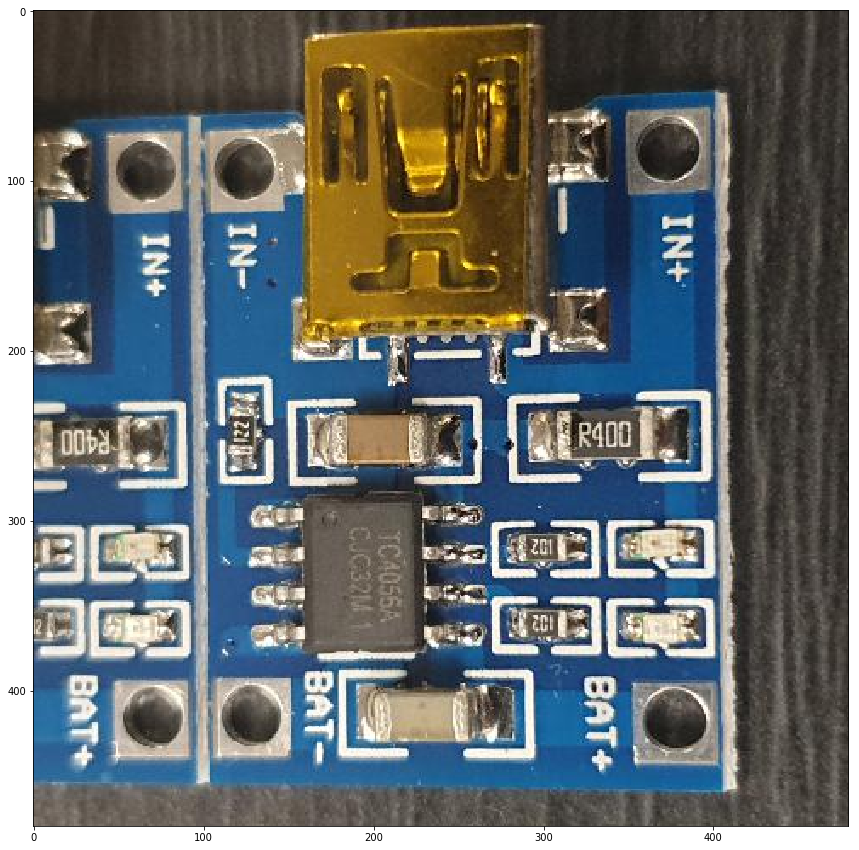

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [10]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.1:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

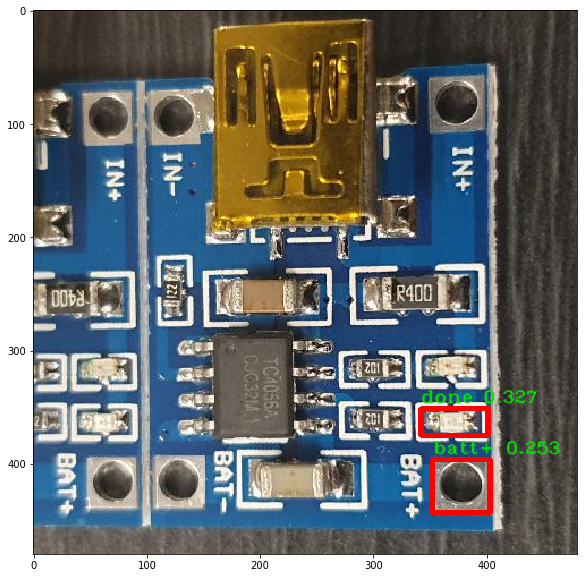

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

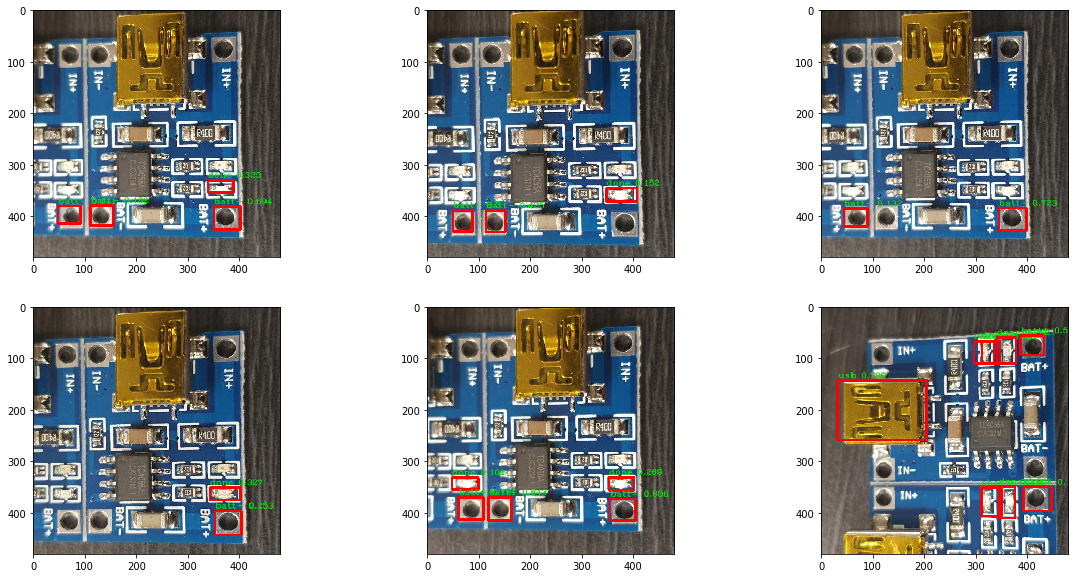

In [12]:
from math import ceil

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i in range(6):
    original_img = cv2.imread("data/JPEGImages/circuit_05" + str(i+1) + ".jpg")
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    results = tfnet2.return_predict(original_img)
    
    ax[ceil(i/3)-1, i%3].imshow(boxing(original_img, results))

## Predicting on a Video

In [14]:
cap = cv2.VideoCapture('data/circuit_2.mp4')
# width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
# height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

cv2.resizeWindow('Stream', (480, 480))

ret, frame = cap.read()
vw = frame.shape[1]
vh = frame.shape[0]
print("Video size: (%d, %d)" %(vw, vh))

fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# detecting objects video의 경우 원본 영상 데이터를 transpose 하므로 
# height 및 width 좌표 대칭 필요!!!!!
out = cv2.VideoWriter('data/circuit_2_output.mp4',fourcc, 20.0, (vh, vw))
print('transposed frame: ', (vh,vw))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)        
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)
        # detecting objects video의 경우 원본 영상 데이터를 transpose 하므로 
        # height 및 width 좌표 대칭 필요!!!!!
        new_frame = cv2.transpose(new_frame)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

Video size: (1280, 720)


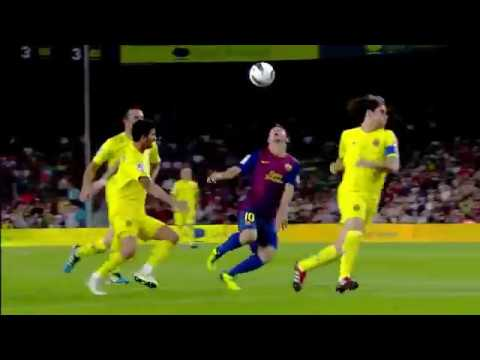

In [52]:
from IPython.display import YouTubeVideo
YouTubeVideo('1MwIVcni0P4')